# Setup the Environment
importing all the necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
import glob
import matplotlib.pyplot as plt
from IPython.display import display
import missingno as msno
import numpy as np
import seaborn as sns
from pandas.api.types import CategoricalDtype
print("environment setup")

environment setup


### Import all csv from the folder 2023 


In [2]:
#the directory where your CSV files are located
directory_path = '2023/'


# Use glob to get a list of all CSV files in the specified directory
csv_files = glob.glob(directory_path + '*.csv')

print(len(csv_files)) # its printing the number of files in 2023 folder

73


### Reading through the CSV of 2023 data and handling any error found 
going through each element of csv_files and appending only the important five columns and removing all the other additional data

In [3]:
dfs = []
# Step 1 : Loop through each CSV file and read it into a DataFrame
for file in csv_files:
    
    try:                             
        df = pd.read_csv(file)      
    except:
        print("some error was thrown while trying to read{}".format(file))
        continue
    col_count=1 #this variable is to ensure only the first five columns of all the datasets have been included and them being the ones mentioned.
    
    #step 2: appending only the columns needed for the infographic
    for col in df.columns:
        if 'date' in col.lower() and col_count<=5:     # checking if date is present in col.lower() as different ppl have named it differently
            df.rename(columns={col: 'date'}, inplace=True)
            col_count+=1
        if 'time' in col.lower() and col_count<=5:
            df.rename(columns={col: 'time'}, inplace=True)
            col_count+=1
        if 'direction' in col.lower() and col_count<=5:
            df.rename(columns={col: 'direction'}, inplace=True)
            col_count+=1
        if 'type' in col.lower() and col_count<=5: 
            #print(col.lower())
            df.rename(columns={col: 'type'}, inplace=True)
            col_count+=1
        if 'occupancy' in col.lower() and col_count<=5:
            df.rename(columns={col: 'occupancy'}, inplace=True)
            col_count+=1
    try:
        #step 3: appending the columns we need on to a list
        dfs.append(df.loc[:, ["date", "time", "direction", "type", "occupancy"]]) 
    except:
        print("some error was thrown while trying to concatanate {}".format(file))
        continue
# Step 4: Concatenate DataFrames
combined_df= pd.concat(dfs, ignore_index=True)
# Display the resulting DataFrame
combined_df


some error was thrown while trying to concatanate 2023/22792758.csv
some error was thrown while trying to read2023/22792751.csv


,date,time,direction,type,occupancy
0,23-10-2023,10.30am,out,car,20
1,23-10-2023,10.30am,out,car,20
2,23-10-2023,10.30am,out,car,20
3,23-10-2023,10.30am,out,van,50
4,23-10-2023,10.30am,out,van,100
...,...,...,...,...,...
8270,27/10/2023,08:55am,out,Car,1
8271,27/10/2023,08:55am,out,Bus,20%
8272,27/10/2023,08:55am,out,Car,1
8273,27/10/2023,08:55am,out,Car,1


In [4]:
no_of_notnull_values_in_2023=combined_df["date"].notna().sum() # printing the value of not null values
no_of_notnull_values_in_2023

8078

In [5]:
print(len(dfs))

71


In [6]:
pd.read_csv("2023/22792758.csv") #I have not included this csv file as the data given is very messy and it has ticks instead of entry 
#pd.read_csv("2023/22792751.csv") I have not included this csv file as for some reason pandas is not able to read this csv file

,Date,Time,Direction,Left,Right,CAR,BUS,BICYCLE,MOTORBIKE,TAXI,SCOOTER,VAN,Occupancy,MALE,FEMALE
0,25-10-2023,10:30am,in,NaN,NaN,✓,NaN,NaN,NaN,NaN,NaN,NaN,1,✓,NaN
1,25-10-2023,10:32am,in,NaN,NaN,✓,NaN,NaN,NaN,NaN,NaN,NaN,1,✓,NaN
2,25-10-2023,10:33am,in,NaN,NaN,✓,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,✓
3,25-10-2023,10:33am,in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,✓,1,✓,NaN
4,25-10-2023,10:33am,in,NaN,NaN,NaN,NaN,NaN,✓,NaN,NaN,NaN,1,✓,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,25-10-2023,10:59am,in,NaN,NaN,✓,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,✓
156,25-10-2023,10:59am,in,NaN,NaN,✓,NaN,NaN,NaN,NaN,NaN,NaN,1,✓,NaN
157,25-10-2023,10:59am,in,NaN,NaN,✓,NaN,NaN,NaN,NaN,NaN,NaN,1,✓,NaN
158,25-10-2023,11:00am,in,NaN,NaN,✓,NaN,NaN,NaN,NaN,NaN,NaN,1,✓,NaN


### Similarly handling data for 2022 dataset

In [7]:
directory_path='2022/'
csv_files=glob.glob(directory_path + '*.csv')
print(len(csv_files))#printing the number of files in it

42


In [8]:
dfs = []
# Step 1 : Loop through each CSV file and read it into a DataFrame
for file in csv_files:
    
    try:                             
        df = pd.read_csv(file)      
    except:
        print("some error was thrown while trying to read{}".format(file))
        continue
    col_count=1 #this variable is to ensure only the first five columns of all the datasets have been included and them being the ones mentioned.
    
    #step 2: appending only the columns needed for the infographic
    for col in df.columns:
        if 'date' in col.lower() and col_count<=5:     # checking if date is present in col.lower() as different ppl have named it differently
            df.rename(columns={col: 'date'}, inplace=True)
            col_count+=1
        if 'time' in col.lower() and col_count<=5:
            df.rename(columns={col: 'time'}, inplace=True)
            col_count+=1
        if 'direction' in col.lower() and col_count<=5:
            df.rename(columns={col: 'direction'}, inplace=True)
            col_count+=1
        if 'type' in col.lower() and col_count<=5: 
            #print(col.lower())
            df.rename(columns={col: 'type'}, inplace=True)
            col_count+=1
        if 'occupancy' in col.lower() and col_count<=5:
            df.rename(columns={col: 'occupancy'}, inplace=True)
            col_count+=1
    try:
        #step 3: appending the columns we need on to a list
        dfs.append(df.loc[:, ["date", "time", "direction", "type", "occupancy"]]) 
    except:
        print("some error was thrown while trying to concatanate {}".format(file))
        continue
# Step 4: Concatenate DataFrames
combined_df_2022= pd.concat(dfs, ignore_index=True)
# Display the resulting DataFrame
combined_df_2022

some error was thrown while trying to concatanate 2022/22351432.csv
some error was thrown while trying to concatanate 2022/22351497.csv
some error was thrown while trying to concatanate 2022/22351490.csv


,date,time,direction,type,occupancy
0,25-10-2022,10:30am,in,car,2
1,25-10-2022,10:30am,in,car,2
2,25-10-2022,10:30am,in,car,2
3,25-10-2022,10:30am,in,car,2
4,25-10-2022,10:30am,in,car,1
...,...,...,...,...,...
4010,26-10-2022,11.05am,in,car,2
4011,26-10-2022,11.05am,in,van,1
4012,26-10-2022,11.05am,in,car,1
4013,26-10-2022,11.05am,in,bus,100%


#### As there was some error while handling three files , now I'm trying to handle it seperately

In [9]:
concat_error_df1=pd.read_csv("2022/22351490.csv")
concat_error_df1.rename(columns={"Data":"date","Time":"time","Direction":"direction","Type":"type","Occupancy":"occupancy"},inplace=True)
concat_error_df1.head()

,date,time,direction,type,occupancy,Speed(km/h)
0,2022/10/25,10.39am,in,car,1,0.786
1,2022/10/25,10.40am,in,bus,70%,0.655
2,2022/10/25,10.40am,in,car,1,0.786
3,2022/10/25,10.41am,in,car,1,0.737
4,2022/10/25,10.42am,in,car,1,0.810


In [10]:
concat_error_df2=pd.read_csv("2022/22351497.csv")
concat_error_df2.rename(columns={"Category of vehicle":"type","Date":"date","Time ":"time","Direction of travel":"direction","Occupancy of the Vehicle":"occupancy"},inplace=True)
concat_error_df2.head()

,date,time,direction,type,occupancy,Vehicle Colour,Electric Vehicle
0,27-10-2022,10:52,In,Car,2.0,Black,No
1,27-10-2022,10:52,In,Lorry,2.0,Green,No
2,27-10-2022,10:52,In,Car,1.0,Red,No
3,27-10-2022,10:52,In,Bicycle,1.0,Black,No
4,27-10-2022,10:52,In,Bus,45.0,Blue,No


In [11]:
concat_error_df3=pd.read_csv("2022/22351432.csv")
concat_error_df3.rename(columns={"category":"type"},inplace=True)
concat_error_df3.head()

,date,time,type,occupancy,driver‘s gender,direction
0,27-Oct,10:30,car,2.0,male,in
1,27-Oct,10:30,car,1.0,male,in
2,27-Oct,10:30,car,2.0,female,in
3,27-Oct,10:30,car,1.0,male,in
4,27-Oct,10:30,taxi,1.0,male,in


In [12]:
combined_df_2022_and_errdata= pd.concat([combined_df_2022,concat_error_df1[["date","time","direction","type","occupancy"]],concat_error_df2[["date","time","direction","type","occupancy"]],concat_error_df3[["date","time","direction","type","occupancy"]]], ignore_index=True)


In [13]:
print(combined_df_2022_and_errdata.info())
no_of_notnull_values_in_2022=combined_df_2022_and_errdata["date"].notna().sum() #printing the sum of not null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       4279 non-null   object
 1   time       4279 non-null   object
 2   direction  4279 non-null   object
 3   type       4279 non-null   object
 4   occupancy  4279 non-null   object
dtypes: object(5)
memory usage: 167.5+ KB
None


In [15]:
combined_df= pd.concat([combined_df,combined_df_2022_and_errdata], ignore_index=True) # combining both 2022 and 2023 data
combined_df

,date,time,direction,type,occupancy
0,23-10-2023,10.30am,out,car,20
1,23-10-2023,10.30am,out,car,20
2,23-10-2023,10.30am,out,car,20
3,23-10-2023,10.30am,out,van,50
4,23-10-2023,10.30am,out,van,100
...,...,...,...,...,...
16838,NaN,NaN,NaN,NaN,NaN
16839,NaN,NaN,NaN,NaN,NaN
16840,NaN,NaN,NaN,NaN,NaN
16841,NaN,NaN,NaN,NaN,NaN


In [16]:
combined_df.info()
combined_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16843 entries, 0 to 16842
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       16636 non-null  object
 1   time       16644 non-null  object
 2   direction  16644 non-null  object
 3   type       16643 non-null  object
 4   occupancy  16633 non-null  object
dtypes: object(5)
memory usage: 658.1+ KB


,date,time,direction,type,occupancy
count,16636,16644,16644,16643,16633
unique,157,580,10,76,123
top,25-10-2023,10.50am,in,car,1
freq,2190,589,8386,8925,7223


In [17]:
# isna returns true for all missing values and sum function shows us a sweet output like below of all the missing values
combined_df.isna().sum()


date         207
time         199
direction    199
type         200
occupancy    210
dtype: int64

In [18]:
# number and percentage of missing values according to columns
{col: [combined_df[col].isnull().sum(), f'% {np.round(np.mean(combined_df[col].isnull()*100), 3)}'
      ] for col in combined_df.columns if combined_df[col].isnull().any()}

{'date': [207, '% 1.229'],
 'time': [199, '% 1.181'],
 'direction': [199, '% 1.181'],
 'type': [200, '% 1.187'],
 'occupancy': [210, '% 1.247']}

#### Used heatmap and missing number matrix mentioned below to handle error above and below

where the white lines mention the missing values.

<Axes: >

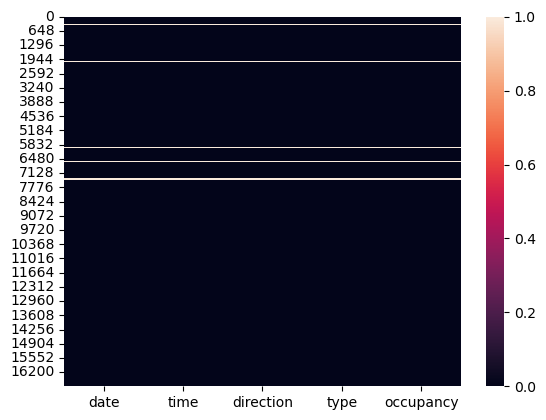

In [22]:
sns.heatmap(combined_df.isnull())

<Axes: >

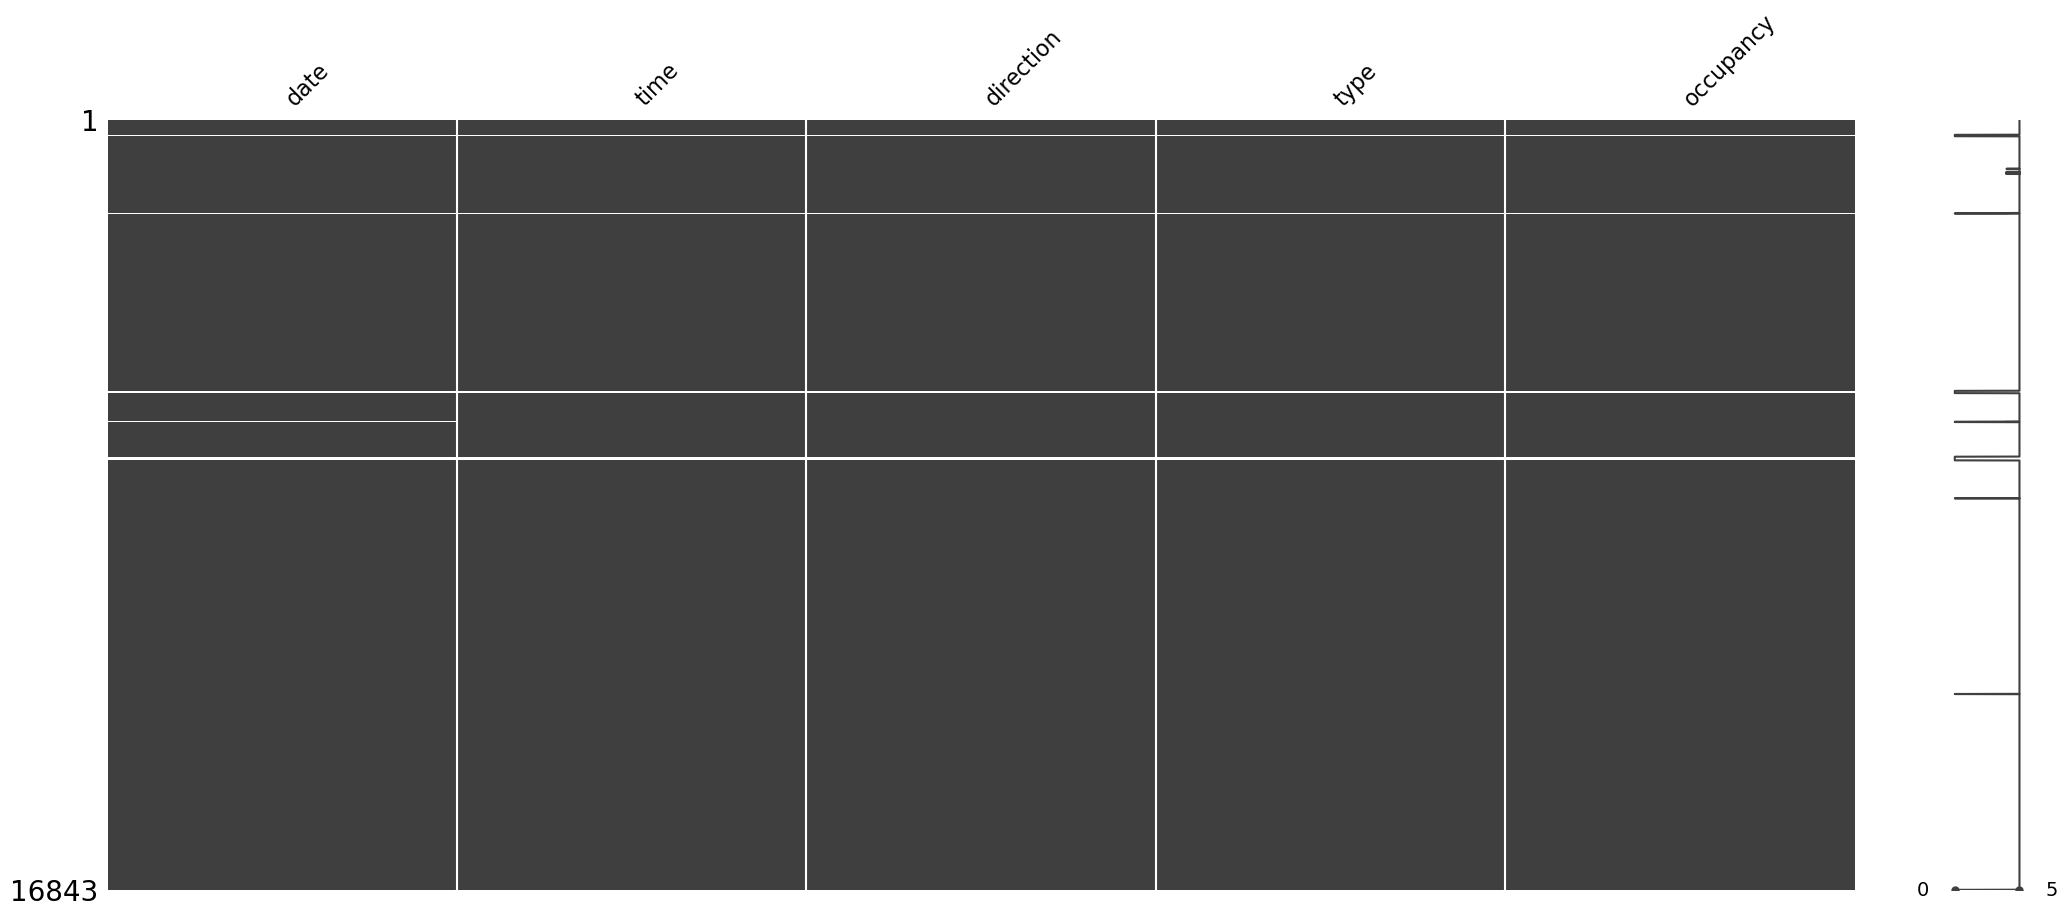

In [23]:
msno.matrix(combined_df)

In [24]:
clean_data=combined_df.dropna(how="any") # dropping any null values 
clean_data

,date,time,direction,type,occupancy
0,23-10-2023,10.30am,out,car,20
1,23-10-2023,10.30am,out,car,20
2,23-10-2023,10.30am,out,car,20
3,23-10-2023,10.30am,out,van,50
4,23-10-2023,10.30am,out,van,100
...,...,...,...,...,...
16833,27-Oct,10:55,in,car,2.0
16834,27-Oct,10:55,in,car,2.0
16835,27-Oct,10:55,in,car,2.0
16836,27-Oct,10:55,in,taxi,2.0


In [25]:
clean_data.info()
clean_data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 16624 entries, 0 to 16837
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       16624 non-null  object
 1   time       16624 non-null  object
 2   direction  16624 non-null  object
 3   type       16624 non-null  object
 4   occupancy  16624 non-null  object
dtypes: object(5)
memory usage: 779.2+ KB


,date,time,direction,type,occupancy
count,16624,16624,16624,16624,16624
unique,157,579,10,75,123
top,25-10-2023,10.50am,in,car,1
freq,2189,589,8386,8919,7220


In [26]:
date_cleaning=clean_data["date"]
print(len(date_cleaning))
df1=clean_data["date"].unique() # trying to loook at all different kinds of format present in the dataset
df1

16624


array(['23-10-2023', '26-10-2023', 'Tuesday, 24 October 2023',
       '24-10-2023', '25-10-2023', '24/10/2023', '23/10/2023', '24-10-23',
       '23-10-23', '25/10/2023', '24-10-24', '24-10-25', '24-10-26',
       '24-10-27', '24-10-28', '24-10-29', '24-10-30', '24-10-31',
       '24-10-32', '24-10-33', '24-10-34', '24-10-35', '24-10-36',
       '24-10-37', '24-10-38', '24-10-39', '24-10-40', '24-10-41',
       '24-10-42', '24-10-43', '24-10-44', '24-10-45', '24-10-46',
       '24-10-47', '24-10-48', '24-10-49', '24-10-50', '24-10-51',
       '24-10-52', '24-10-53', '24-10-54', '24-10-55', '24-10-56',
       '24-10-57', '24-10-58', '24-10-59', '24-10-60', '24-10-61',
       '24-10-62', '24-10-63', '24-10-64', '24-10-65', '24-10-66',
       '24-10-67', '24-10-68', '24-10-69', '24-10-70', '24-10-71',
       '24-10-72', '24-10-73', '24-10-74', '24-10-75', '24-10-76',
       '24-10-77', '24-10-78', '24-10-79', '24-10-80', '24-10-81',
       '24-10-82', '24-10-83', '24-10-84', '24-10-85', '

#### based on the above array trying to handle the date column

In [27]:
# List of possible format strings
format_strings = ['%d-%m-%Y','%d-%m-%y','%Y-%m-%d','%y-%m-%d','%d/%m/%Y','%Y/%m/%d','%d/%m/%y','%y/%m/%d','%d-%b','%A, %d %B %Y'] # wrote this based on looking at unique values printed above
len_of_form_str_arr=len(format_strings)
# Convert date strings to datetime objects
date_objects = []

for date_index,date_string in date_cleaning.items():
    for index,fmt in enumerate(format_strings):
        try:
            date_object = pd.to_datetime(date_string, format=fmt)
            if(date_index<no_of_notnull_values_in_2023):#by default todatetime for '%d-%b' format set the year as 1990 to take care of that
                date_object = date_object.replace(year=2023)
            else:
                date_object = date_object.replace(year=2022)
            date_objects.append(date_object.date())
            break  # Stop trying other formats once successful
        except:
            if(index<len_of_form_str_arr-1):
                continue  # If the current format fails, try the next one
            else:
                if(date_index<no_of_notnull_values_in_2023):
                    date_object = date_object.replace(year=2023)
                else:
                    date_object = date_object.replace(year=2022)
                date_objects.append(date_object.date())

# Print the results
#for date_object in date_objects:
    #print(date_object.date(),len(date_objects))

result_df = pd.DataFrame({'Date_String': date_cleaning, 'date': date_objects})

# Print the result
result_df
print(result_df["date"].unique())
result_df["date"]

[datetime.date(2023, 10, 23) datetime.date(2023, 10, 26)
 datetime.date(2023, 10, 24) datetime.date(2023, 10, 25)
 datetime.date(2023, 10, 27) datetime.date(2022, 10, 25)
 datetime.date(2022, 10, 27) datetime.date(2022, 10, 26)
 datetime.date(2022, 10, 24) datetime.date(2022, 10, 28)]


0        2023-10-23
1        2023-10-23
2        2023-10-23
3        2023-10-23
4        2023-10-23
            ...    
16833    2022-10-27
16834    2022-10-27
16835    2022-10-27
16836    2022-10-27
16837    2022-10-27
Name: date, Length: 16624, dtype: object

In [28]:
clean_data["date"]=result_df["date"]
clean_data

/var/folders/r0/pwqb2pgj0qb88n5h4qflyt8c0000gn/T/ipykernel_74540/2903512942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["date"]=result_df["date"]


,date,time,direction,type,occupancy
0,2023-10-23,10.30am,out,car,20
1,2023-10-23,10.30am,out,car,20
2,2023-10-23,10.30am,out,car,20
3,2023-10-23,10.30am,out,van,50
4,2023-10-23,10.30am,out,van,100
...,...,...,...,...,...
16833,2022-10-27,10:55,in,car,2.0
16834,2022-10-27,10:55,in,car,2.0
16835,2022-10-27,10:55,in,car,2.0
16836,2022-10-27,10:55,in,taxi,2.0


In [29]:
time_cleaning=clean_data["time"]
print(time_cleaning.info())
time_cleaning.unique()

<class 'pandas.core.series.Series'>
Index: 16624 entries, 0 to 16837
Series name: time
Non-Null Count  Dtype 
--------------  ----- 
16624 non-null  object
dtypes: object(1)
memory usage: 259.8+ KB
None


array(['10.30am', '10.35am', '10.40am', '10.45am', '10.50am', '10.55am',
       '10:35 AM', '10:40 AM', '10:45 AM', '10:50 AM', '10:55 AM',
       '11:00 AM', '11:05 AM', '10:05 AM', '10:10 AM', '10:15 AM',
       '10:20 AM', '10:25 AM', '10:30 AM', '10:15:00 AM', '10:20:00 AM',
       '10:25:00 AM', '10:30:00 AM', '10:35:00 AM', '10:40:00 AM',
       '10:45:00 AM', '9:30am', '9:35am', '9:40am', '9:45am', '9:50am',
       '9:55am', '10:00am', '10:30am', '10:35am', '10:40am', '10:45am',
       '10:50am', '10:55am', '11:00am', '10:25am', '10.00am', '10.01am',
       '10.02am', '10.04am', '10.05am', '10.06am', '10.07am', '10.08am',
       '10.09am', '10.10am', '10.11am', '10.12am', '10.13am', '10.14am',
       '10.15am', '10.16am', '10.17am', '10.18am', '10.19am', '10.20am',
       '10.21am', '10.22am', '10.23am', '10.24am', '10.25am', '10.26am',
       '10.27am', '10.28am', '10:35AM', '10:40AM', '10:45AM', '10:50AM',
       '10:55AM', '11:00AM', '09:45', '09:50', '09:55', '10:00', '10:05

#### Similarly doing it for time column also 

In [30]:
# List of possible format strings
time_format_strings = ['%I.%M%p','%I.%M %p','%I:%M %p','%I:%M%p', '%H:%M', '%H:%M:%S','%H:%M:%S %p','%H:%M:%S%p','%I%p']
len_of_form_str_arr = len(time_format_strings)

# Convert date strings to datetime objects
time_objects = []

for time_index,time_string in time_cleaning.items():
    for index,fmt in enumerate(time_format_strings):
        try:
            if("qm" in time_string):# added this error handling statement because after compiling I got to know :C
                time_string=time_string.replace("q","a")
            time_object = pd.to_datetime(time_string.strip(), format=fmt)
            time_objects.append(time_object.time())
            break  # Stop trying other formats once successful
        except:
            if(index<len_of_form_str_arr-1):
                continue  # If the current format fails, try the next one
            else:
                time_objects.append(None)

# Print the results
#for time_object in time_objects:
    #print(time_object,len(time_objects))
#len(time_cleaning)

result_df1 = pd.DataFrame({'Time_String': time_cleaning, 'time': time_objects})

# Print the result
result_df1
#print(result_df1["time"].unique())
result_df1

,Time_String,time
0,10.30am,10:30:00
1,10.30am,10:30:00
2,10.30am,10:30:00
3,10.30am,10:30:00
4,10.30am,10:30:00
...,...,...
16833,10:55,10:55:00
16834,10:55,10:55:00
16835,10:55,10:55:00
16836,10:55,10:55:00


In [31]:
result_df1[result_df1["time"].isnull()]["Time_String"]

Series([], Name: Time_String, dtype: object)

In [32]:
clean_data["time"]=result_df1["time"]
clean_data

/var/folders/r0/pwqb2pgj0qb88n5h4qflyt8c0000gn/T/ipykernel_74540/1657164804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["time"]=result_df1["time"]


,date,time,direction,type,occupancy
0,2023-10-23,10:30:00,out,car,20
1,2023-10-23,10:30:00,out,car,20
2,2023-10-23,10:30:00,out,car,20
3,2023-10-23,10:30:00,out,van,50
4,2023-10-23,10:30:00,out,van,100
...,...,...,...,...,...
16833,2022-10-27,10:55:00,in,car,2.0
16834,2022-10-27,10:55:00,in,car,2.0
16835,2022-10-27,10:55:00,in,car,2.0
16836,2022-10-27,10:55:00,in,taxi,2.0


In [33]:
print(clean_data["direction"].unique())
clean_data["direction"]=clean_data["direction"].str.lower().str.strip()

['out' 'Out' 'IN' 'in' 'OUT' ' in' ' ' 'In' ' out' ' in ']


/var/folders/r0/pwqb2pgj0qb88n5h4qflyt8c0000gn/T/ipykernel_74540/2179419382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["direction"]=clean_data["direction"].str.lower().str.strip()


In [34]:
clean_data["direction"].unique()

array(['out', 'in', ''], dtype=object)

In [35]:
clean_data=clean_data.drop(clean_data[clean_data["direction"]==""].index)
print(clean_data["direction"].unique())
clean_data

['out' 'in']


,date,time,direction,type,occupancy
0,2023-10-23,10:30:00,out,car,20
1,2023-10-23,10:30:00,out,car,20
2,2023-10-23,10:30:00,out,car,20
3,2023-10-23,10:30:00,out,van,50
4,2023-10-23,10:30:00,out,van,100
...,...,...,...,...,...
16833,2022-10-27,10:55:00,in,car,2.0
16834,2022-10-27,10:55:00,in,car,2.0
16835,2022-10-27,10:55:00,in,car,2.0
16836,2022-10-27,10:55:00,in,taxi,2.0


In [36]:
clean_data["type"].unique()

array(['car', 'van', 'bus', 'bicycle', 'bus ', 'lorry', 'taxi',
       'motorbike', 'Bus', 'Car', 'Taxi', 'Van', 'Bicycle', 'Lorry',
       'truck', 'motorcycle', 'Bu', 'C', 'V', 'L', 'S', 'T', 'scooter',
       'Bike', 'bike', 'bicycle ', 'double decker bus',
       'single decker bus', 'mini truck', 'moterbike', 'other', 'van ',
       'car ', 'scooter ', 'A.V', 'Bus ', 'Truck', ' car', ' van', ' bus',
       ' lorry', ' taxi', ' bicycle', ' motorbike', ' scooter', 'motor',
       'u2', 'M', 'Bi', 'Motorbike', 'taxi ', 'Electric Car', 'tractor',
       'escooter', 'CAR', 'BUS', 'CAR ', 'VAN', 'BIKE', 'BICYCLE', 'TAXI',
       '4', '80%', '2', '10%', '3', '1', '90%', '20%', '50%',
       'Electric Bike', 'Motor Bike', 'Pedestrian', 'e-scooter', 'moto'],
      dtype=object)

In [37]:
clean_data["type"]=clean_data["type"].str.lower().str.strip()
print(clean_data["type"].unique())
clean_data[clean_data["type"]=="pedestrian"].loc[:,["occupancy"]]

['car' 'van' 'bus' 'bicycle' 'lorry' 'taxi' 'motorbike' 'truck'
 'motorcycle' 'bu' 'c' 'v' 'l' 's' 't' 'scooter' 'bike'
 'double decker bus' 'single decker bus' 'mini truck' 'moterbike' 'other'
 'a.v' 'motor' 'u2' 'm' 'bi' 'electric car' 'tractor' 'escooter' '4' '80%'
 '2' '10%' '3' '1' '90%' '20%' '50%' 'electric bike' 'motor bike'
 'pedestrian' 'e-scooter' 'moto']


,occupancy
11928,1
11935,3
11950,2
11960,7
11974,1
16212,1
16219,3
16234,2
16244,7
16258,1


In [38]:
# Find rows where 'Vehicle' column contains '4','80%','2','10%','3','1','90%','20%','50%'
condition = clean_data['type'].isin(['4','80%','2','10%','3','1','90%','20%','50%'])
# Swap 'Occupancy' and 'Vehicle' columns for rows where the condition is True
clean_data.loc[condition, ['occupancy', 'type']] = clean_data.loc[condition, ['type', 'occupancy']].values
print(clean_data["type"].unique())


['car' 'van' 'bus' 'bicycle' 'lorry' 'taxi' 'motorbike' 'truck'
 'motorcycle' 'bu' 'c' 'v' 'l' 's' 't' 'scooter' 'bike'
 'double decker bus' 'single decker bus' 'mini truck' 'moterbike' 'other'
 'a.v' 'motor' 'u2' 'm' 'bi' 'electric car' 'tractor' 'escooter'
 'electric bike' 'motor bike' 'pedestrian' 'e-scooter' 'moto']


In [39]:
#mapping for replacement
replacement_mapping = {
    'electric car': 'car',
    'car': 'car',
    'c': 'car',
    'bu':'bus',
    'bus': 'bus',
    'single decker bus': 'bus',
    'double decker bus': 'bus',
    'u2':'bus',
    'motorcycle':'motorbike',
    'motorbike':'motorbike',
    'bike':'motorbike',
    'moterbike':'motorbike',
    'motor':'motorbike',
    'm':'motorbike',
    'motor bike':'motorbike',
    'moto':'motorbike',
    'van':'van',
    'v':'van',
    'bicycle':'bicycle',
    'bi':'bicycle',
    'lorry':'lorry',
    'l':'lorry',
    'truck':'lorry',
    't':'lorry',
    'mini truck':'lorry',
    'taxi':'taxi',
    't':'taxi',
    's':'scooter',
    'scooter':'scooter',
    'escooter':'scooter',
    'e-scooter':'scooter',
    'electric bike':'scooter',
    'a.v':'other',
    'pedestrian':'other',
    'tractor':'other',
    'other':'other'
    
}
# Replacing values in the 'type' column
clean_data["type"]=clean_data["type"].replace(replacement_mapping)

clean_data["type"].unique()

array(['car', 'van', 'bus', 'bicycle', 'lorry', 'taxi', 'motorbike',
       'scooter', 'other'], dtype=object)

In [40]:
clean_data["occupancy"].unique()

array([20, 50, 100, 40, 10, 5, 30, '1', '5%', '2', '4', '1%', '3', '25%',
       '0%', '60%', '80%', '100%', '50%', '10%', '20%', '70', '70%',
       '95%', '75%', '15%', '5', '85%', '90%', '2%', 35, 1, 49, 2, 3, 70,
       28, 14, 7, 34, 4, '3%', '30%', '40%', 8, 15, '9%', '36%', '7%',
       '45%', '27%', '73%', '13%', '55%', '91%', '64%', '4%', '100', ' 2',
       ' 1', ' 60%', ' 70%', ' 100%', ' 3', ' 5', ' 4', ' 90%', ' 40%',
       '8', '65%', '110%', 80, 60, 96, '26%', '120%', '12%', 25, 55,
       '37%', 75, 'empty', 'medium', 13, 9, 11, 12, 17, 16, 18, 'Empty',
       'Half-Full', ' 50%', ' 80%', ' 30%', ' 10%', 0.25, 0.166666667,
       0.5, 0.75, 0.125, 0.0625, 0.333333333, 0.375, 85, 90, 0, 24, 48,
       64, 72, 56, '20', ' 20%', ' 15%', ' 25%', 45.0], dtype=object)

In [41]:
bus_data=clean_data[clean_data["type"]=="bus"].loc[:,["occupancy"]]
bus_data['occupancy'].unique()

array([10, 20, 5, 30, '5%', '1%', '25%', '0%', '1', '60%', '80%', '100%',
       '50%', '10%', '20%', '70%', '95%', '75%', '15%', '85%', '90%',
       '2%', 35, 49, 70, 28, 14, 1, 7, 34, 4, 2, 3, '3%', '30%', '40%', 8,
       15, '9%', '36%', '7%', '45%', '27%', '73%', '13%', '55%', '91%',
       '64%', '4%', '100', '2', ' 60%', ' 70%', ' 100%', ' 90%', ' 40%',
       '65%', '110%', 80, 60, 40, 96, 50, '26%', '120%', '12%', 25, 55,
       '37%', 75, 'empty', 'medium', 13, 9, 11, 12, 17, 16, 18, 'Empty',
       'Half-Full', ' 50%', ' 80%', ' 30%', ' 10%', 0.125, 0.0625,
       0.333333333, 0.375, 85, 90, 0, 100, 24, 48, 72, 56, '20', ' 20%',
       ' 15%', ' 25%', 45.0], dtype=object)

In [42]:
not_bus_data=clean_data[clean_data["type"]!="bus"].loc[:,["occupancy"]]
print(not_bus_data['occupancy'].unique())
clean_data[clean_data["occupancy"]==8].loc[:,"type"]

[20 50 100 40 10 '1' '2' '4' '3' '70' '5' 1 2 3 4 5 '10%' '90%' ' 2' ' 1'
 ' 3' ' 5' ' 4' '8' '20%' '40%' '100%' '80%' '50%' '70%' '60%' '1%' 7 0.25
 0.166666667 0.5 0.75 25 75 '25%' '75%' '2%' '5%' 64 8.0]


2151     bus
9511     bus
11602    bus
11949    bus
12522    van
13795    bus
15886    bus
16233    bus
16806    van
Name: type, dtype: object

### Similarly based on the unique column also did for occupancy

In [43]:
def clean_occupancy(vehicle_type, value):
    if vehicle_type == 'bus':
        # Convert percentage values for buses to a value
        if isinstance(value, str):                            # starting with string datatype
            value = value.replace('%', '').strip()
            try:
                value = float(round(float(value) / 100*60))     #assuming the capacity of a bus to be 60 in an average
                if(value>1):
                    value=(1.0)*60
            except :
                if("empty" in value.lower()):
                    value=0
                elif("medium" in value.lower() or "half" in value.lower()):
                    value=float(round(0.5*60))
        elif isinstance(value,float):
            if(value>1):
                value=value/100*60
        elif isinstance(value,int):
            value=float(value)/100*60
                
    else:
        
        if isinstance(value, str):
            value = value.replace('%', '').strip()
            if(int(value)<10): #assuming all vehicles in this category has less than 10 seats then value is not a percentage
                value=float(value)
            else:
                # assuming all cars are either 4,5 seater 
                if(vehicle_type=="car" or vehicle_type=="taxi"):
                    if(int(value)==25 or int(value)==50 or int(value)==75 or int(value)==100): # handling missing data by assuming car has 4 and 5 seats based on the data
                        value=int(value)/100*4
                    elif(int(value)==20 or int(value)==40 or int(value)==60 or int(value)==80):
                        value=int(value)/100*5
                    else:
                        value=None
                elif(vehicle_type=="van"):
                    value=int(value)/10
                elif(vehicle_type=="lorry" or vehicle_type=="motorbike"):
                    value=int(value)/100*2
                else:
                    value=1.0
        elif isinstance(value,float):
            if(value<1):
                if(vehicle_type=="car" or vehicle_type=="taxi"):
                    if value==0.25 or value==0.50 or value==0.75: # handling missing data by assumptions
                        value=value/100*4
                    elif value==0.20 or value==0.40 or value==0.60 or value==0.80:
                        value=value/100*5
                    else:
                        value=None
                elif(vehicle_type=="van"):
                    value=(value*10)
                elif(vehicle_type=="lorry" or vehicle_type=="motorbike"):
                    value=value/100*2
                else:
                    value=1.0
        elif isinstance(value,int):
            if(value<10):
                value=float(value)
            else:
                # assuming all cars are either 4,5 seater 
                if(vehicle_type=="car" or vehicle_type=="taxi"):
                    if(int(value)==25 or int(value)==50 or int(value)==75 or int(value)==100): # handling missing data by assumptions
                        value=int(value)/100*4
                    elif(int(value)==20 or int(value)==40 or int(value)==60 or int(value)==80):
                        value=int(value)/100*5
                    else:
                        value=None
                elif(vehicle_type=="van"):
                    value=(int(value)/10)
                elif(vehicle_type=="lorry" or vehicle_type=="motorbike"):
                    value=int(value)/100*2
                else:
                    value=1.0
    if(vehicle_type=="van"):
        value=round(value)
        value=float(value)
    if(vehicle_type=="bicycle"):
        value=1.0
    return value

# Apply the cleaning function to the 'Occupancy' column based on 'Vehicle_Type'
clean_data["occupancy"] = clean_data.apply(lambda row: clean_occupancy(row['type'], row['occupancy']), axis=1)


#### using box plot and violin plot to handle outliers

/Users/vishal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vishal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vishal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vishal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

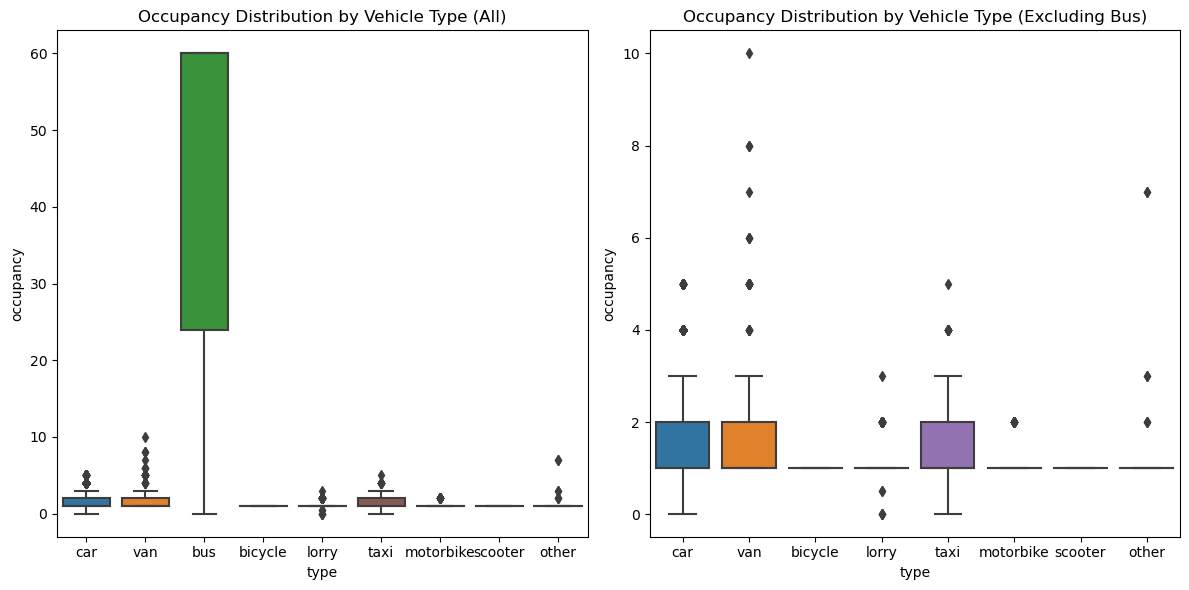

In [45]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for all vehicle types
sns.boxplot(ax=axes[0], x='type', y='occupancy', data=clean_data)
axes[0].set_title('Occupancy Distribution by Vehicle Type (All)')

# Plot excluding 'bus' type
sns.boxplot(ax=axes[1], x='type', y='occupancy', data=clean_data[clean_data['type'] != 'bus'])
axes[1].set_title('Occupancy Distribution by Vehicle Type (Excluding Bus)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

/Users/vishal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vishal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vishal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vishal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

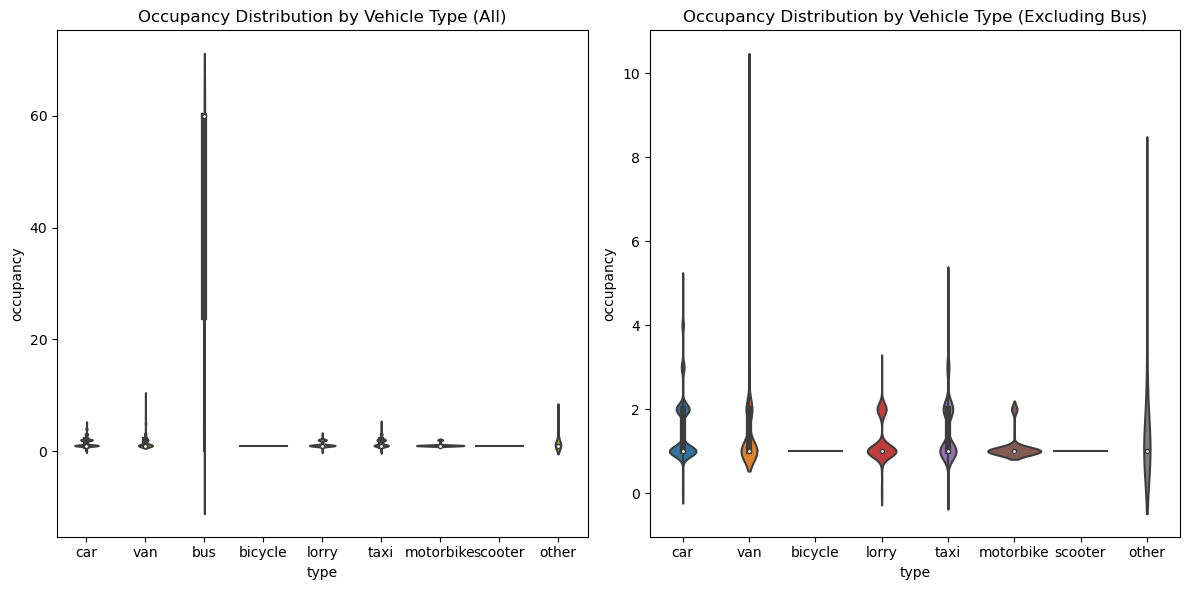

In [46]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Violin plot for all vehicle types
sns.violinplot(ax=axes[0], x='type', y='occupancy', data=clean_data)
axes[0].set_title('Occupancy Distribution by Vehicle Type (All)')

# Violin plot excluding 'bus' type
sns.violinplot(ax=axes[1], x='type', y='occupancy', data=clean_data[clean_data['type'] != 'bus'])
axes[1].set_title('Occupancy Distribution by Vehicle Type (Excluding Bus)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [47]:

check=clean_data[(clean_data["type"]=="bicycle")].loc[:,"occupancy"]
check.unique()

array([1.])

In [48]:
clean_data.reset_index(drop=True, inplace=True)

In [49]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16623 entries, 0 to 16622
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       16623 non-null  object 
 1   time       16623 non-null  object 
 2   direction  16623 non-null  object 
 3   type       16623 non-null  object 
 4   occupancy  16605 non-null  float64
dtypes: float64(1), object(4)
memory usage: 649.5+ KB


In [50]:
dataset=clean_data.dropna()

In [51]:
dataset

,date,time,direction,type,occupancy
0,2023-10-23,10:30:00,out,car,1.0
1,2023-10-23,10:30:00,out,car,1.0
2,2023-10-23,10:30:00,out,car,1.0
3,2023-10-23,10:30:00,out,van,5.0
4,2023-10-23,10:30:00,out,van,10.0
...,...,...,...,...,...
16618,2022-10-27,10:55:00,in,car,2.0
16619,2022-10-27,10:55:00,in,car,2.0
16620,2022-10-27,10:55:00,in,car,2.0
16621,2022-10-27,10:55:00,in,taxi,2.0


In [52]:
dataset['datetime'] = pd.to_datetime(dataset['date'].astype(str) + ' ' + dataset['time'].astype(str),format='%Y-%m-%d %H:%M:%S')
dataset_dtindex=dataset.set_index('datetime')
dataset_dtindex=dataset_dtindex.sort_index()
dataset_dtindex

/var/folders/r0/pwqb2pgj0qb88n5h4qflyt8c0000gn/T/ipykernel_74540/1348037305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['datetime'] = pd.to_datetime(dataset['date'].astype(str) + ' ' + dataset['time'].astype(str),format='%Y-%m-%d %H:%M:%S')


,date,time,direction,type,occupancy
datetime,,,,,
2022-10-24 10:20:00,2022-10-24,10:20:00,out,bus,60.0
2022-10-24 10:20:00,2022-10-24,10:20:00,out,lorry,1.0
2022-10-24 10:20:00,2022-10-24,10:20:00,out,car,1.0
2022-10-24 10:20:00,2022-10-24,10:20:00,out,car,1.0
2022-10-24 10:20:00,2022-10-24,10:20:00,out,car,1.0
...,...,...,...,...,...
2023-10-27 10:20:00,2023-10-27,10:20:00,out,bus,1.0
2023-10-27 10:20:00,2023-10-27,10:20:00,out,van,2.0
2023-10-27 10:20:00,2023-10-27,10:20:00,out,car,1.0


In [53]:
dataset['day'] = dataset['datetime'].dt.day_name()
dataset['year'] = dataset['datetime'].dt.year
dataset["hour"]=dataset["datetime"].dt.hour
dataset=dataset.loc[:,["datetime","day","year","hour","direction","type","occupancy"]]
dataset=dataset.sort_values("datetime")
dataset=dataset.drop_duplicates()
dataset=dataset.reset_index(drop=True)
dataset

/var/folders/r0/pwqb2pgj0qb88n5h4qflyt8c0000gn/T/ipykernel_74540/1778519977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['day'] = dataset['datetime'].dt.day_name()
/var/folders/r0/pwqb2pgj0qb88n5h4qflyt8c0000gn/T/ipykernel_74540/1778519977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['year'] = dataset['datetime'].dt.year
/var/folders/r0/pwqb2pgj0qb88n5h4qflyt8c0000gn/T/ipykernel_74540/1778519977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,datetime,day,year,hour,direction,type,occupancy
0,2022-10-24 10:20:00,Monday,2022,10,out,bus,60.0
1,2022-10-24 10:20:00,Monday,2022,10,out,lorry,1.0
2,2022-10-24 10:20:00,Monday,2022,10,out,car,1.0
3,2022-10-24 10:21:00,Monday,2022,10,out,car,2.0
4,2022-10-24 10:21:00,Monday,2022,10,out,car,1.0
...,...,...,...,...,...,...,...
3574,2023-10-27 10:20:00,Friday,2023,10,out,van,2.0
3575,2023-10-27 10:20:00,Friday,2023,10,out,car,2.0
3576,2023-10-27 10:20:00,Friday,2023,10,out,taxi,2.0
3577,2023-10-27 10:20:00,Friday,2023,10,out,bus,1.0


### printing the bar graph to find the vehicle most used by people of bath near the university

/Users/vishal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vishal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vishal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


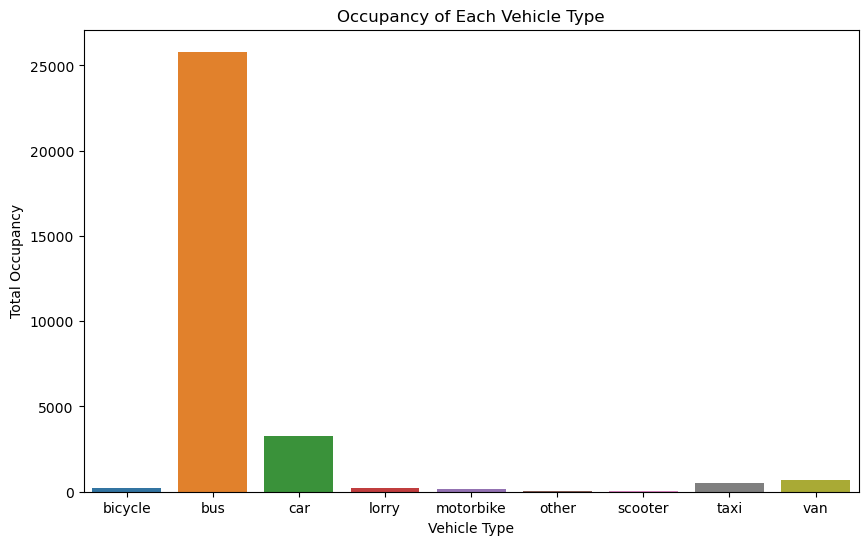

In [55]:
# Group by 'type' and sum the 'occupancy'
occupancy_counts = dataset.groupby('type')['occupancy'].sum().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='occupancy', data=occupancy_counts)
plt.title('Occupancy of Each Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Occupancy')
plt.show()


#### Very intrigued by the fact that both last year and this year has almost the same distribution

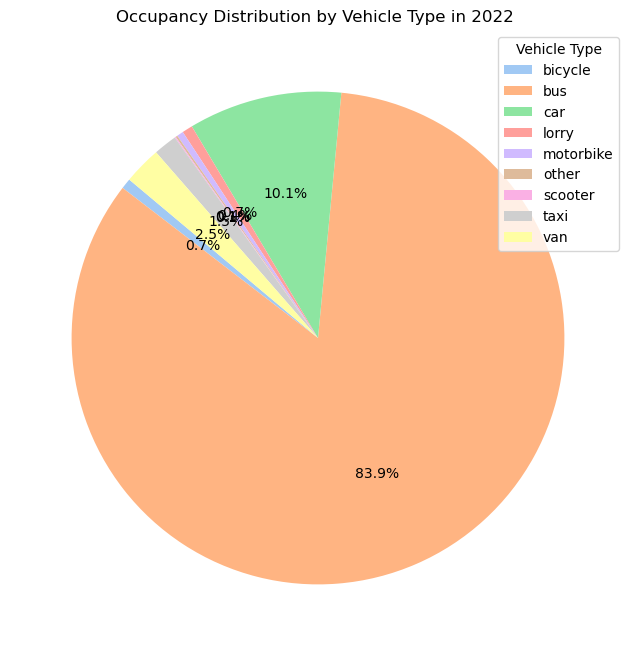

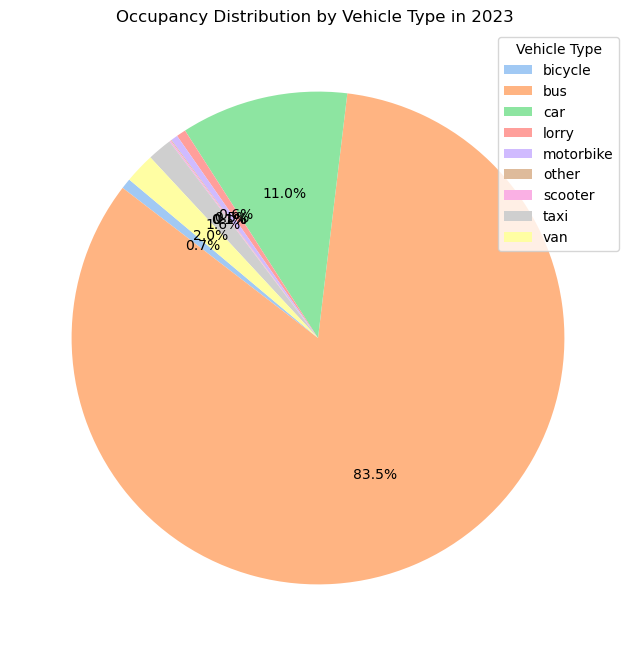

In [57]:
# Filter data for the year 2022 
dataset_2022 = dataset[(dataset['year'] == 2022)]

# Group by 'type' and sum the 'occupancy'
occupancy_counts_2022 = dataset_2022.groupby('type')['occupancy'].sum().reset_index()

# Plot pie chart for 2022 using Seaborn color palette
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
plt.pie(occupancy_counts_2022['occupancy'], labels=None, autopct='%1.1f%%', startangle=140)
plt.title('Occupancy Distribution by Vehicle Type in 2022 ')

# Add legend
plt.legend(occupancy_counts_2022['type'], title='Vehicle Type', loc='upper right')
plt.show()

# Filter data for the year 2023 and exclude 'bus'
dataset_2023 = dataset[(dataset['year'] == 2023)]

# Group by 'type' and sum the 'occupancy'
occupancy_counts_2023 = dataset_2023.groupby('type')['occupancy'].sum().reset_index()

# Plot pie chart for 2023 using Seaborn color palette
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
plt.pie(occupancy_counts_2023['occupancy'], labels=None, autopct='%1.1f%%', startangle=140)
plt.title('Occupancy Distribution by Vehicle Type in 2023 ')

# Add legend
plt.legend(occupancy_counts_2023['type'], title='Vehicle Type', loc='upper right')
plt.show()

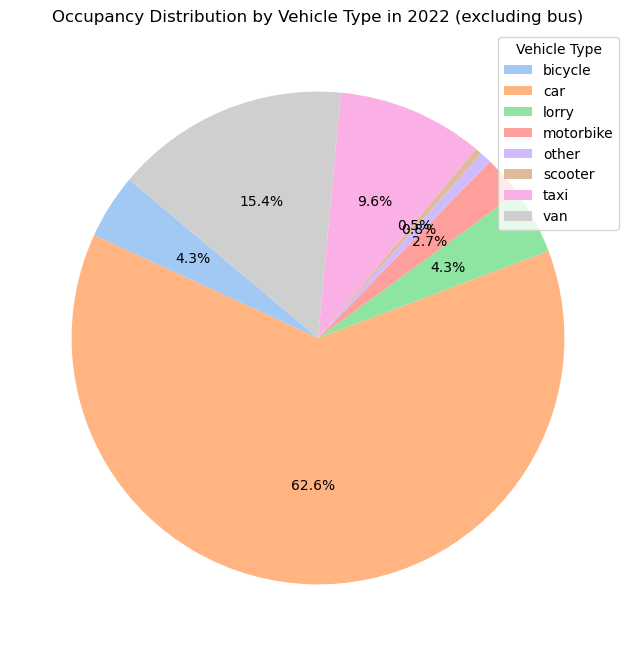

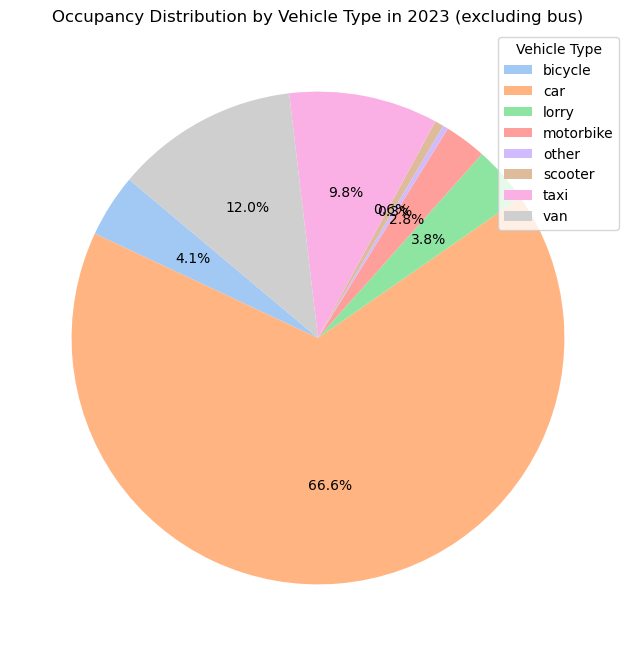

In [58]:
# Filter data for the year 2022 and exclude 'bus'
dataset_2022 = dataset[(dataset['year'] == 2022) & (dataset['type'] != 'bus')]

# Group by 'type' and sum the 'occupancy'
occupancy_counts_2022 = dataset_2022.groupby('type')['occupancy'].sum().reset_index()

# Plot pie chart for 2022 using Seaborn color palette
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
plt.pie(occupancy_counts_2022['occupancy'], labels=None, autopct='%1.1f%%', startangle=140)
plt.title('Occupancy Distribution by Vehicle Type in 2022 (excluding bus)')

# Add legend
plt.legend(occupancy_counts_2022['type'], title='Vehicle Type', loc='upper right')
plt.show()

# Filter data for the year 2023 and exclude 'bus'
dataset_2023 = dataset[(dataset['year'] == 2023) & (dataset['type'] != 'bus')]

# Group by 'type' and sum the 'occupancy'
occupancy_counts_2023 = dataset_2023.groupby('type')['occupancy'].sum().reset_index()

# Plot pie chart for 2023 using Seaborn color palette
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
plt.pie(occupancy_counts_2023['occupancy'], labels=None, autopct='%1.1f%%', startangle=140)
plt.title('Occupancy Distribution by Vehicle Type in 2023 (excluding bus)')

# Add legend
plt.legend(occupancy_counts_2023['type'], title='Vehicle Type', loc='upper right')
plt.show()

### To find if Monday blues is a thing xD

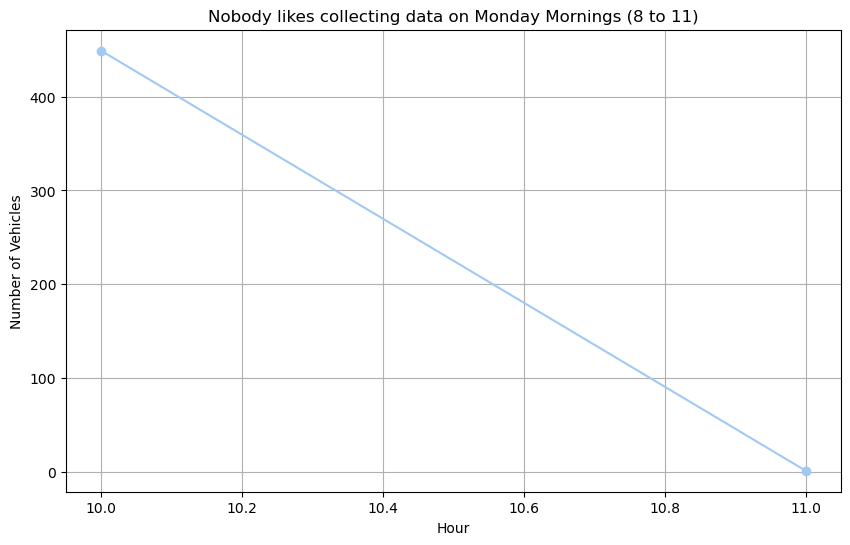

In [61]:
# Filter data for Monday mornings from 8 to 10
monday_morning_data = dataset[(dataset['day'] == 'Monday') & (dataset['hour'].between(8, 11))]

# Group by hour and count the number of entries
hourly_count = monday_morning_data.groupby('hour').size()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(hourly_count.index, hourly_count.values, marker='o')
plt.title('Nobody likes collecting data on Monday Mornings (8 to 11)')
plt.xlabel('Hour')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.show()

#### Well we did listen to ken and not crowd on friday to collect data 

/Users/vishal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vishal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vishal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vishal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

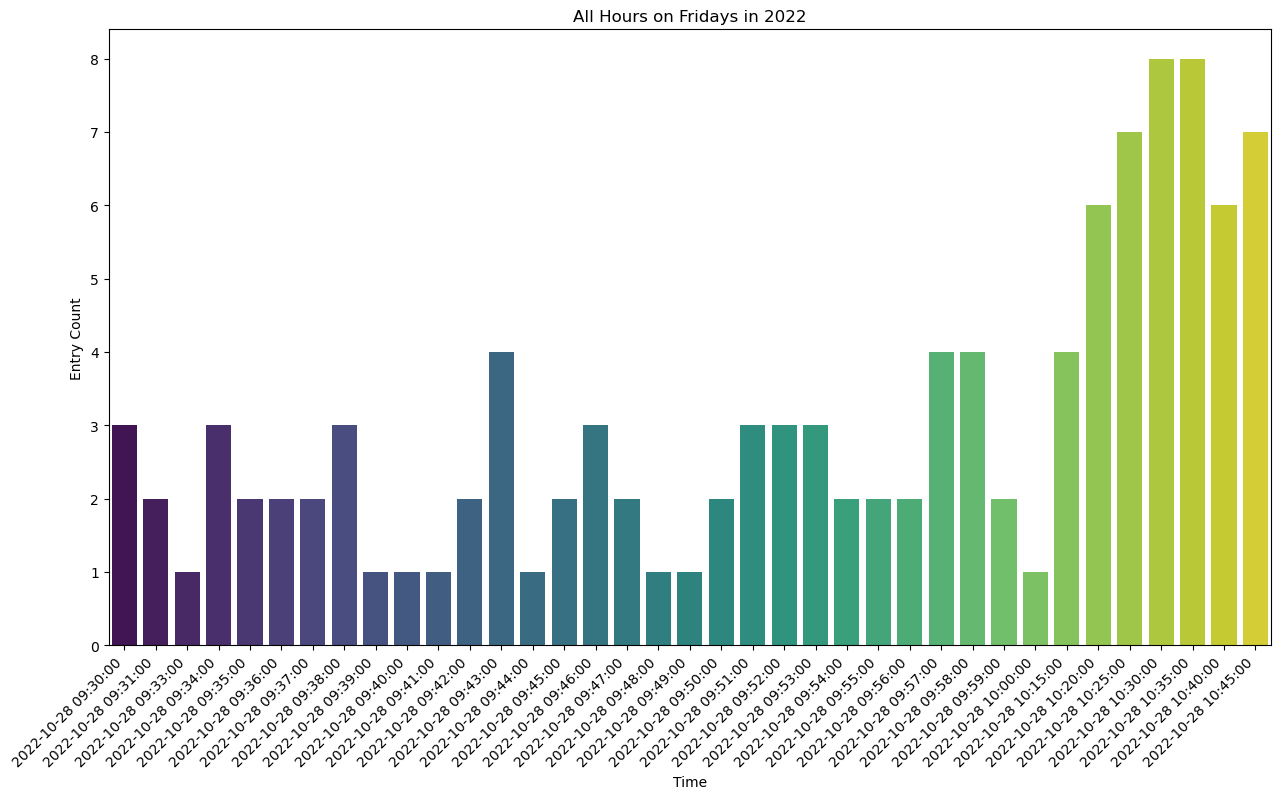

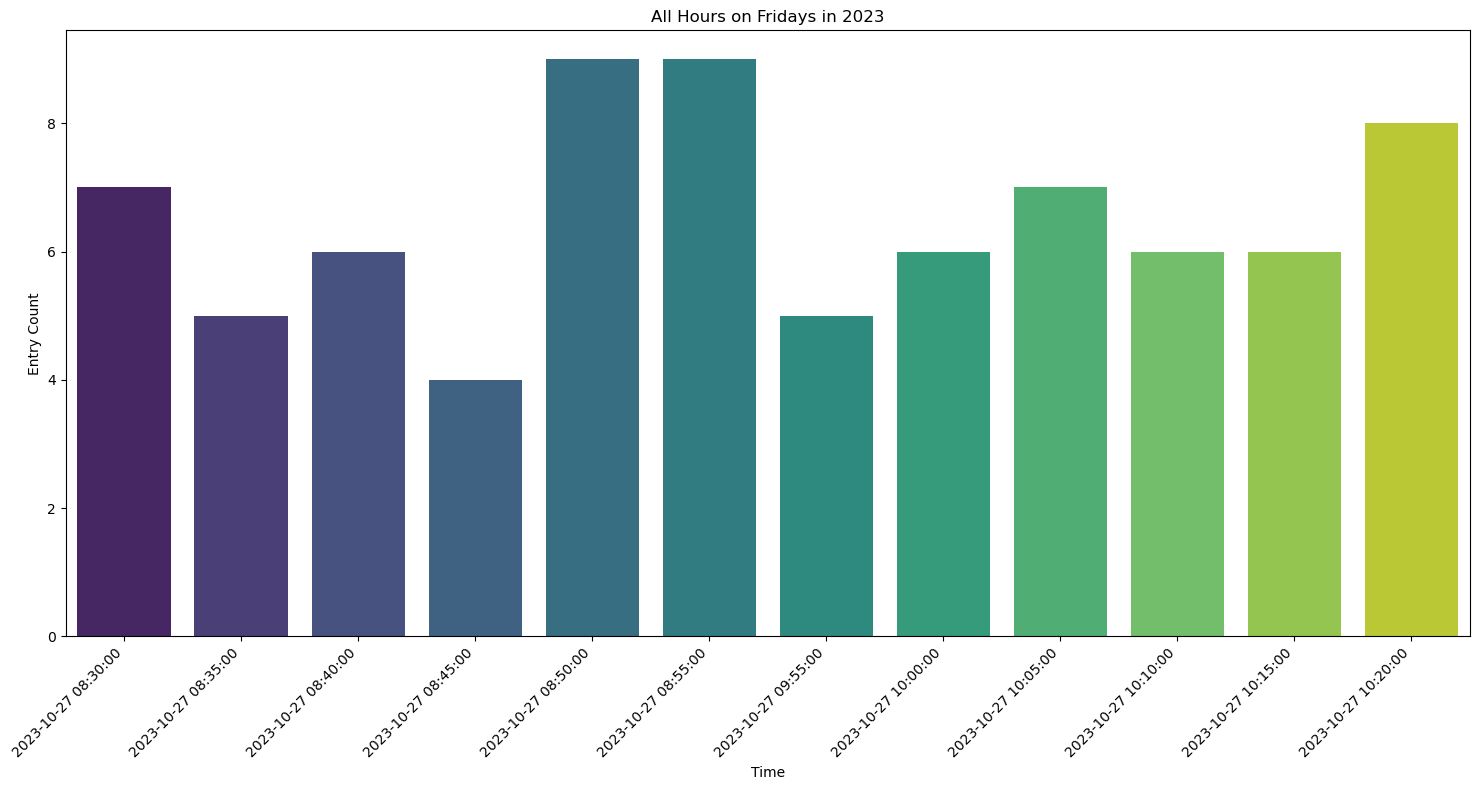

In [62]:
# Filter data for the year 2022
data_2022 = dataset[dataset['year'] == 2022]

# Filter data for the year 2023
data_2023 = dataset[dataset['year'] == 2023]

# Plotting for 2022
plt.figure(figsize=(15, 8))

# Plot for 2022, all hours on Fridays
data_counts_2022_friday = data_2022[data_2022['day'] == 'Friday'].groupby(['hour', 'datetime']).size().reset_index(name='count')
sns.barplot(x='datetime', y='count', data=data_counts_2022_friday, palette='viridis')
plt.xlabel('Time')
plt.ylabel('Entry Count')
plt.title('All Hours on Fridays in 2022')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Plotting for 2023
plt.figure(figsize=(15, 8))

# Plot for 2023, all hours on Fridays
data_counts_2023_friday = data_2023[data_2023['day'] == 'Friday'].groupby(['hour', 'datetime']).size().reset_index(name='count')
sns.barplot(x='datetime', y='count', data=data_counts_2023_friday, palette='viridis')
plt.xlabel('Time')
plt.ylabel('Entry Count')
plt.title('All Hours on Fridays in 2023')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()